# Make predictions in production
The objective is to predict the age of people from their face images. The metric objective is Mean Absolute Error (MAE).

The model is stored in Hugging Face, use the following link to download it:

https://huggingface.co/AntonioArteaga7/Face-Regressor/resolve/main/model_face.h5

This model should be downloaded and saved in folder 'models' as 'model_face.h5'.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

2025-10-22 16:32:32.902918: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2025-10-22 16:32:37.572363: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2025-10-22 16:32:37.580129: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-10-22 16:32:45.753592: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
# (height, width, channels)
input_shape = (224, 224, 3)
folder_models = '../models'
path_test = '../test'

In [3]:
def extract_age_from_filename(filename):
    """Extracts the age from the first number of the file name."""
    return float(filename.split('_')[0])

def create_dataframe_from_directory(directory):
    """Create a DataFrame with file names and ages as columns."""
    filenames = [f for f in os.listdir(directory) if f.endswith('.jpg')]
    ages = [extract_age_from_filename(f) for f in filenames]
    df = pd.DataFrame({'filename': filenames, 'age': ages})
    return df


df = create_dataframe_from_directory(path_test)

# Obtain images and target without using ImageDataGenerator
images = [os.path.join(path_test, f) for f in df['filename']]
labels = df['age'].tolist()

def prediction(path: str, model) -> None:
    '''Image preprocessing and prediction for regression model.'''
    test_img = image.load_img(path, target_size=input_shape[:2])
    test_img = image.img_to_array(test_img) / 255.0
    test_img = np.expand_dims(test_img, axis=0)

    pred = model.predict(test_img)[0][0]  # Scalar output for regression
    return f"{pred:.0f}"

In [4]:
# Load the model
model = load_model(os.path.join(folder_models, 'model_face.h5'))

# Make predictions
predict = []
for img in images:
    predict.append(prediction(img, model))

1/1 [==============================] - 0s 131ms/step


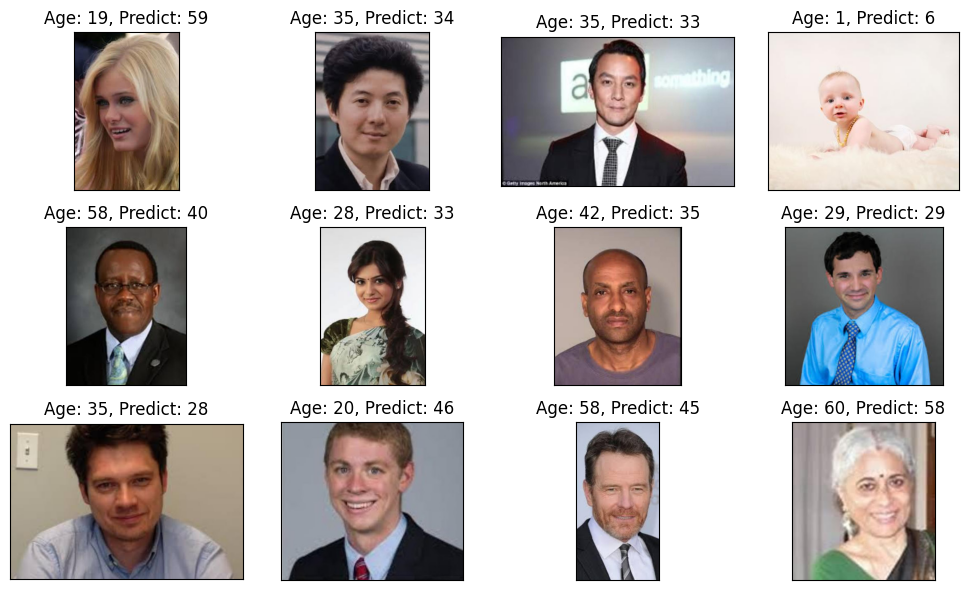

In [5]:
figure, axes = plt.subplots(nrows=3, ncols=4, figsize=(10, 6))
for ax, img_path, label, pred in zip(axes.ravel(), images, labels, predict):
    img = plt.imread(img_path)
    ax.imshow(img)
    ax.set_title(f"Age: {label:.0f}, Predict: {pred}")
    ax.set_xticks([])
    ax.set_yticks([])

plt.tight_layout()
plt.show()

In [6]:
y_true = np.array(labels)
y_pred = np.array(predict).astype(float)

print(f"Mean Absolute Error: {mean_absolute_error(y_true, y_pred)}")
print(f"Mean Squared Error: {mean_squared_error(y_true, y_pred)}")
print(f"R^2 Score: {r2_score(y_true, y_pred)}")

Mean Absolute Error: 10.5
Mean Squared Error: 243.83333333333334
R^2 Score: 0.15286624203821653


## Conclusions
The MAE (Mean Absolute Error) is acceptable. The performance of the model is related to the dataset quality, pretrained model used (Resnet50), convolutional neuronal network design and batch size of training. Due to limitations in computing power, this model could not be trained better.

The performance of the model can be improved by:
1. Dividing the target age, and training a differente model for each group, for example, from 1 to 10, 11 to 20, 21 to 30 and so on.
2. Dividing the dataset by ethnic and training a differente model for each group, for example, white people, black people, asian people, indian people and latin people.
3. Combining steps 1 and 2.